<a href="https://colab.research.google.com/github/Schwarzam/Testes-Deep-Learning/blob/master/Cap%203%20test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) =imdb.load_data(num_words=10000)

In [0]:
import numpy as np  

In [0]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.accuracy])


In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [74]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 147us/step - loss: 0.4918 - acc: 0.7949 - val_loss: 0.3778 - val_acc: 0.8607
Epoch 2/20
15000/15000 [==============================] - 2s 121us/step - loss: 0.2943 - acc: 0.9038 - val_loss: 0.3072 - val_acc: 0.8816
Epoch 3/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.2172 - acc: 0.9309 - val_loss: 0.2856 - val_acc: 0.8886
Epoch 4/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.1720 - acc: 0.9437 - val_loss: 0.2769 - val_acc: 0.8883
Epoch 5/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.1398 - acc: 0.9561 - val_loss: 0.2819 - val_acc: 0.8882
Epoch 6/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.1153 - acc: 0.9647 - val_loss: 0.2985 - val_acc: 0.8858
Epoch 7/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.0961 - acc: 0.9715 - val_loss: 0.3775 - 

<function matplotlib.pyplot.show>

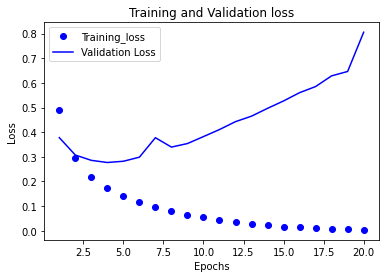

In [89]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs =  range(1, len(history_dict['acc']) + 1)
plt.plot (epochs, loss_values, 'bo', label='Training_loss')
plt.plot (epochs, val_loss_values,'b', label='Validation Loss')
plt.title ('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show

<function matplotlib.pyplot.show>

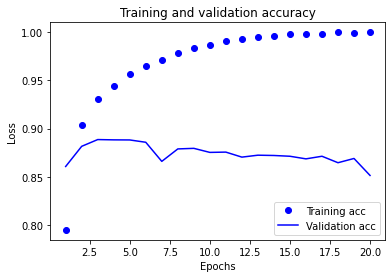

In [92]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, history_dict['acc'], 'bo', label= 'Training acc')
plt.plot(epochs, history_dict['val_acc'], 'b', label= 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show
